# Assignment 4

## Sherwyn Braganza | Isaac McClanahan

**1) Use the make_moons dataset from scikit-learn with 500 samples, noise = 0.1 to make an artificial data-set.  This is a 2 class data-set.**

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt


features, targets = datasets.make_moons(n_samples=500, shuffle=True, noise=0.1)

**2) Split this into training and validation data (no test data necessary here.**

In [2]:
x_train, y_train = features[0:400], targets[0:400]
x_val, y_val = features[400:], targets[400:]

**3) Plot both the training and validation datasets.**

C:\Users\101059072\Anaconda3\envs\Machine_Learning\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


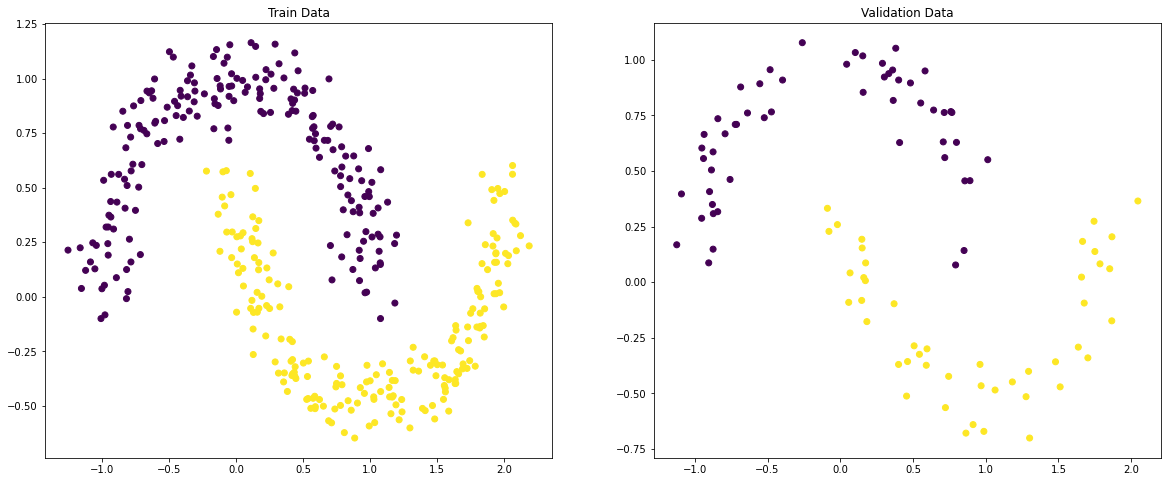

In [3]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(x_train[:,0], x_train[:,1], c=y_train)
axs[0].set_title('Train Data')
axs[1].scatter(x_val[:,0], x_val[:,1], c=y_val)
axs[1].set_title('Validation Data')
fig.set_figwidth(20)
fig.set_figheight(8)
fig.show()

**4) Implement a neural network model (that has reasonable performance) using the Sequential API.**

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

model_sequential = keras.Sequential(name="my_example_model")
model_sequential.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model_sequential.add(layers.Dense(32, activation="relu", name="my_second_layer"))
model_sequential.add(layers.Dense(1, activation="sigmoid", name="my_last_layer"))
model_sequential.build(input_shape=(None, 2))
model_sequential.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model_sequential.fit(x_train, y_train, epochs=150, batch_size=100, validation_data=(x_val, y_val))

Train on 400 samples, validate on 100 samples
Epoch 1/150
400/400 [==============================] - 2s 4ms/sample - loss: 0.7067 - accuracy: 0.5125 - val_loss: 0.6575 - val_accuracy: 0.8600
Epoch 2/150
400/400 [==============================] - 0s 80us/sample - loss: 0.6504 - accuracy: 0.8325 - val_loss: 0.6172 - val_accuracy: 0.9200
Epoch 3/150
400/400 [==============================] - 0s 83us/sample - loss: 0.6153 - accuracy: 0.8175 - val_loss: 0.5846 - val_accuracy: 0.8900
Epoch 4/150
400/400 [==============================] - 0s 89us/sample - loss: 0.5863 - accuracy: 0.8150 - val_loss: 0.5552 - val_accuracy: 0.8900
Epoch 5/150
400/400 [==============================] - 0s 89us/sample - loss: 0.5587 - accuracy: 0.8125 - val_loss: 0.5233 - val_accuracy: 0.8800
Epoch 6/150
400/400 [==============================] - 0s 86us/sample - loss: 0.5298 - accuracy: 0.8175 - val_loss: 0.4916 - val_accuracy: 0.8800
Epoch 7/150
400/400 [==============================] - 0s 93us/sample - loss: 0

**5) Plot the loss (of both training and validation) over the training epochs.**

C:\Users\101059072\Anaconda3\envs\Machine_Learning\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


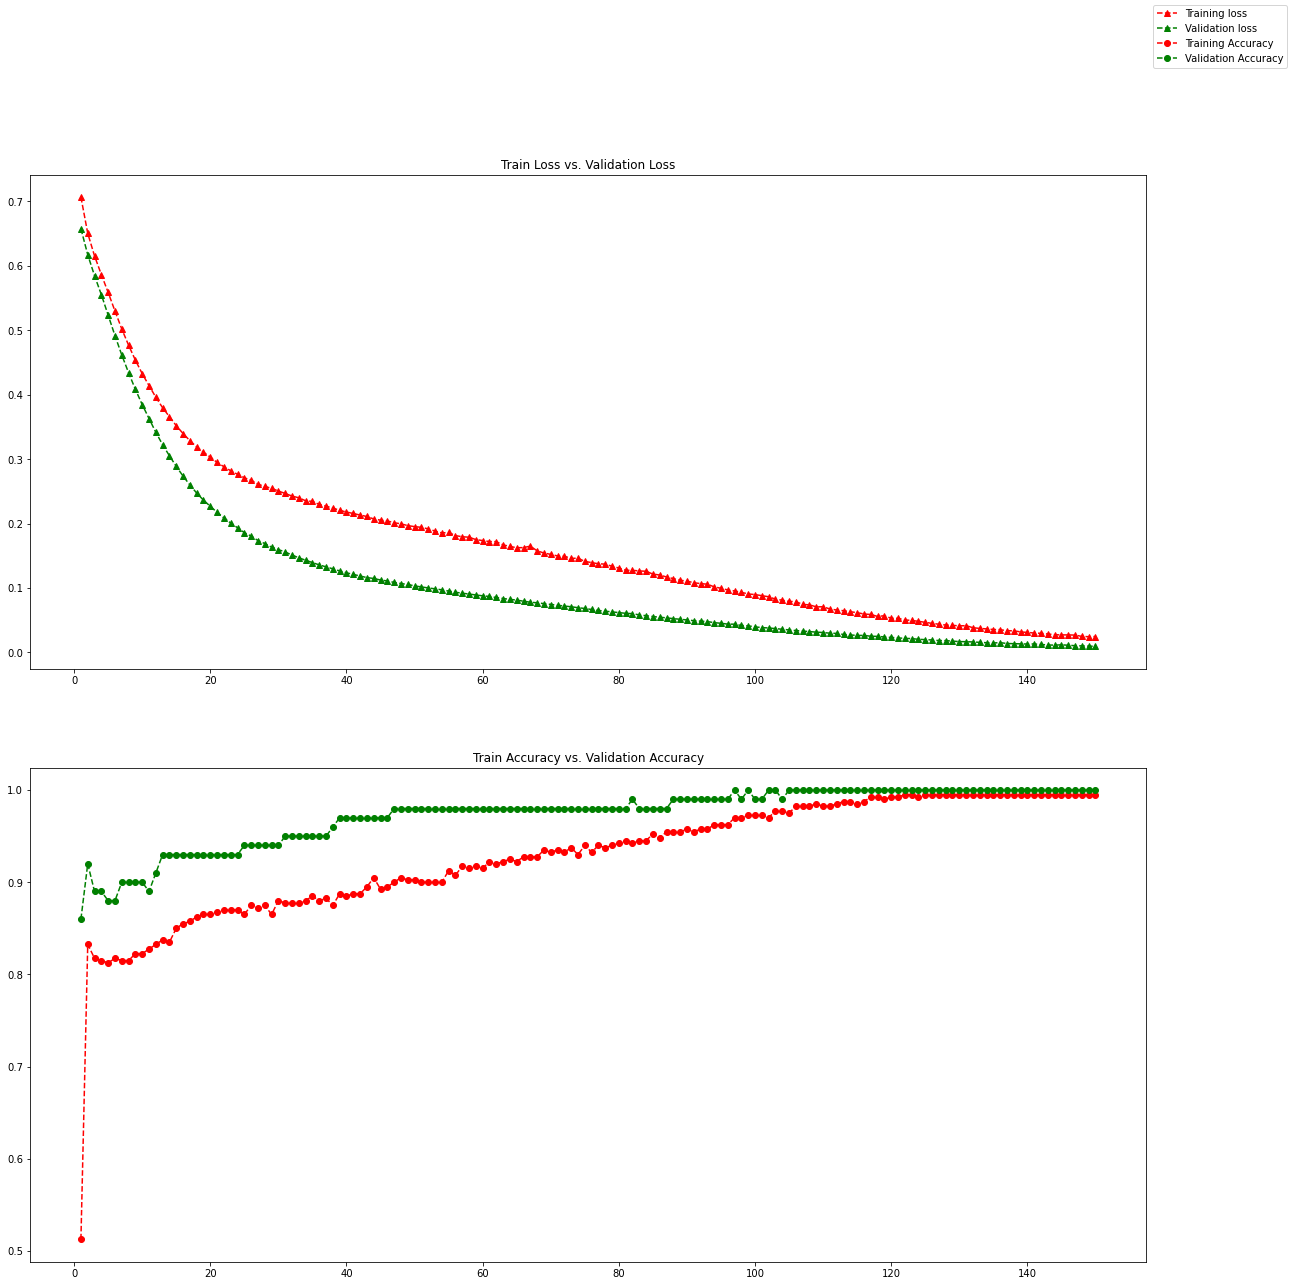

In [31]:
sequential_history = model_sequential.history.history

epochs = range(1, len(sequential_history['loss']) + 1)

fig, axs = plt.subplots(2)
axs[0].plot(epochs, sequential_history['loss'],
            label="Training loss", color = 'red', linestyle='--', marker = '^')
axs[0].plot(epochs, sequential_history['val_loss'],
            label="Validation loss", color = 'green', linestyle='--', marker = '^')
axs[0].set_title('Train Loss vs. Validation Loss')
axs[1].plot(epochs, sequential_history['accuracy'],
            label="Training Accuracy", color = 'red', linestyle='--', marker = 'o')
axs[1].plot(epochs, sequential_history['val_accuracy'],
            label="Validation Accuracy", color = 'green', linestyle='--', marker = 'o')
axs[1].set_title('Train Accuracy vs. Validation Accuracy')
fig.set_figwidth(20)
fig.set_figheight(20)
fig.legend()
fig.show()

**6) Plot the data _and_ the decision regions together on a new plot.**

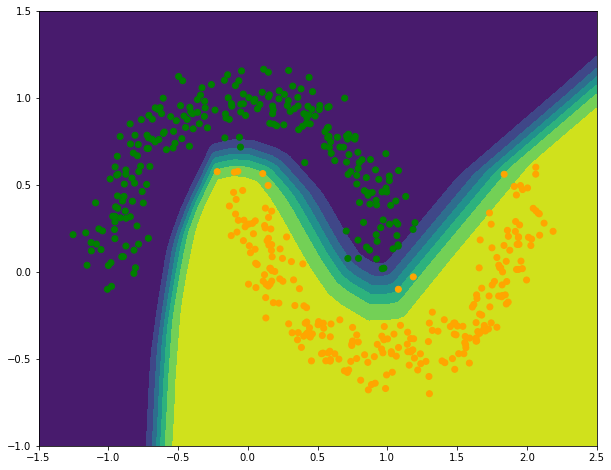

In [33]:
import numpy as np
res = 400

plt.rcParams["figure.figsize"] = (10, 8)

def addColor( values ):
    colors = []
    for i in values:
        if i < 0.5:
            colors.append("green")
        else:
            colors.append("orange")
    return colors

def desi

"""
# Make meshgrid of xy points
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, res), np.linspace(-1, 1.5, res), indexing="xy")
xy = np.dstack((xx, yy))

# Make meshgrid of equal size containing predictions
zz = np.ndarray((res, res))
for i in range(0, res):
    zz[i] = model_sequential(xy[i])[:, 0]
"""

# Graph decision regions
plt.contourf(xx, yy, zz, levels=8)

# predictions_sequential = np.round(model_sequential.predict(x_val))
xx, yy= np.meshgrid(features[:,0], features[:,1], sparse=True)
plt.scatter(xx, yy, c=addColor( model_sequential.predict(features) ) )


plt.show()